In [146]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from numpy import savetxt

In [147]:

df_2022_2023_Reg = pd.read_csv('BookerDownloadedData/Booker_2022-2023.csv')
df_2021_2022_Reg = pd.read_csv('BookerDownloadedData/Booker_2021-2022.csv')
df_2020_2021_Reg = pd.read_csv('BookerDownloadedData/Booker_2020-2021.csv')
df_2019_2020_Reg = pd.read_csv('BookerDownloadedData/Booker_2019-2020.csv')
df_2018_2019_Reg = pd.read_csv('BookerDownloadedData/Booker_2018-2019.csv')
df_2027_2018_Reg = pd.read_csv('BookerDownloadedData/Booker_2017-2018.csv')
df_2016_2017_Reg = pd.read_csv('BookerDownloadedData/Booker_2016-2017.csv')
df_2015_2016_Reg = pd.read_csv('BookerDownloadedData/Booker_2015-2016.csv')
df_2023_Playoff = pd.read_csv('BookerDownloadedData/Booker_2023Playoff.csv')
df_2022_Playoff = pd.read_csv('BookerDownloadedData/Booker_2022Playoff.csv')
df_2021_Playoff = pd.read_csv('BookerDownloadedData/Booker_2021Playoff.csv')



In [149]:

# List of dataframes to be merged
dataframes = [df_2022_2023_Reg, df_2021_2022_Reg, df_2020_2021_Reg, df_2019_2020_Reg, df_2018_2019_Reg, df_2027_2018_Reg, df_2016_2017_Reg, df_2015_2016_Reg, df_2023_Playoff, df_2022_Playoff, df_2021_Playoff]

# Merge the dataframes
merged_df = pd.concat(dataframes, ignore_index=True)
merged_df = merged_df.drop(['Age', 'Unnamed: 5', 'Unnamed: 7', 'Tm', 'G', 'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'ORB', 'FT', 'DRB', 'TOV'], axis=1)



In [150]:
#Commented out but this saves Devuin Booker's stats

# merged_df = merged_df.dropna()

# words_to_delete = ['Inactive', 'Did Not Dress', 'Did Not Play']

# # Convert 'FG' column to string type
# merged_df['FG'] = merged_df['FG'].astype(str)

# # Use boolean indexing to filter out rows containing the words
# for word in words_to_delete:
#     merged_df = merged_df[~merged_df['FG'].str.contains(word)]

# merged_df.to_csv('all_booker_stats.csv', index=False)

In [151]:
#dates = merged_df["Date"].values.tolist()
jokic_games = np.array([545, 548, 601, 467, 473, 501, 425, 431, 308, 343, 235, 249, 263, 286, 168, 176, 82, 155, 33])
jokic_scores = []
for i in jokic_games:
    score = int(merged_df.loc[i, '+/-'])
    jokic_scores.append(score)

jokic_scores = np.array(jokic_scores)

#print(merged_df['+/-'].median())
print(np.median(jokic_scores))


-5.0


In [152]:
doncic_games = [307, 251, 280, 300, 306, 163, 181, 125, 0, 23, 64]
doncic_scores = []

for i in doncic_games:
    score = int(merged_df.loc[i, '+/-'])
    doncic_scores.append(score)

doncic_scores = np.array(doncic_scores)

#print(merged_df['+/-'].median())
print(np.median(doncic_scores))

7.0


In [153]:
vucevic_games = [559, 598, 471, 524, 398, 341, 271, 188, 205, 209, 134, 152, 20, 63]
vucevic_scores = []

for i in vucevic_games:
    score = int(merged_df.loc[i, '+/-'])
    vucevic_scores.append(score)

vucevic_scores = np.array(vucevic_scores)

print(np.median(vucevic_scores))

7.0


In [154]:
bogdanovic_games = [554, 594, 465, 519, 429, 433, 326, 351, 237, 291, 167, 212, 142, 162, 17]
bogdanovic_scores = []

for i in bogdanovic_games:
    score = int(merged_df.loc[i, '+/-'])
    bogdanovic_scores.append(score)

vucevic_scores = np.array(bogdanovic_scores)

print(np.median(bogdanovic_scores))


-5.0


In [155]:
sabonis_games =  np.array([457, 482, 517, 535, 429, 433, 326, 351, 277, 199, 172, 122, 153, 19, 58, 66, 72])
sabonis_scores = []
for i in sabonis_games:
    score = int(merged_df.loc[i, '+/-'])
    sabonis_scores.append(score)

sabonis_scores = np.array(sabonis_scores)

#print(merged_df['+/-'].median())
print(np.median(sabonis_scores))
#print(jokic_scores)

-4.0


In [156]:
euro_scores = np.concatenate((jokic_scores, doncic_scores, sabonis_scores, vucevic_scores, bogdanovic_scores))

In [157]:
df = merged_df.dropna(subset=['+/-'], how='all')
indices_to_drop = [457, 482, 517, 535, 429, 433, 326, 351, 277, 199, 172, 122, 153, 19, 58, 66, 72
                  ,307, 251, 280, 300, 306, 163, 181, 125, 0, 23, 64,
                  559, 598, 471, 524, 398, 341, 271, 188, 205, 209, 134, 152, 20, 63,
                  554, 594, 465, 519, 429, 433, 326, 351, 237, 291, 167, 212, 142, 162, 17,
                  584, 600, 480, 498, 394, 434, 251, 280, 286, 181, 95, 96, 125]
df = merged_df.drop(indices_to_drop)
df = df.dropna()

In [158]:
data = df['+/-']
# Convert the data to string type
data = [str(value) for value in data]

data = [value for value in data if value not in ['Did Not Dress', 'Did Not Play', "Inactive"]]
data = [float(value) for value in data]
data = np.array(data)

print("Booker's median +/- is:", np.median(data))

Booker's median +/- is: 0.0


In [159]:
non_euro_scores = data

In [160]:


# Calculate the mean and standard deviation for each group
mean_euro = np.mean(euro_scores)
std_euro = np.std(euro_scores)
mean_non_euro = np.mean(non_euro_scores)
std_non_euro = np.std(non_euro_scores)

# Calculate the 95% confidence interval for each group
ci_euro = stats.t.interval(0.95, len(euro_scores) - 1, loc=mean_euro, scale=stats.sem(euro_scores))
ci_non_euro = stats.t.interval(0.95, len(non_euro_scores) - 1, loc=mean_non_euro, scale=stats.sem(non_euro_scores))

print("Devin Booker's 95% Confidence interval +/- scores against Eastern European Players: [", round(ci_euro[0], 2), ",", round(ci_euro[1], 2), "]")
print("Devin Booker's 95% Confidence interval +/- scores against other Teams: [", round(ci_non_euro[0], 2), ",", round(ci_non_euro[1], 2), "]")




Devin Booker's 95% Confidence interval +/- scores against Eastern European Players: [ -7.34 , -0.25 ]
Devin Booker's 95% Confidence interval +/- scores against other Teams: [ -1.33 , 1.17 ]


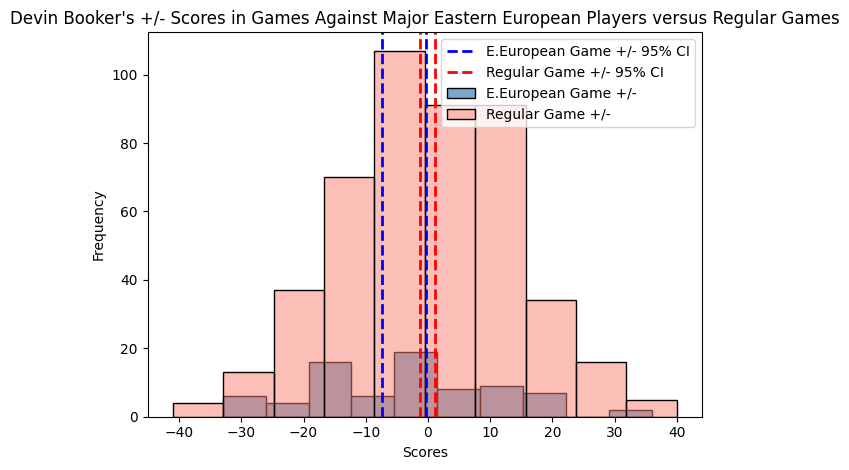

In [161]:
# Plotting
sns.histplot(euro_scores, bins=10, color='steelblue', alpha=0.7, label='E.European Game +/- ')
sns.histplot(non_euro_scores, bins=10, color='salmon', alpha=0.5, label='Regular Game +/-')
plt.axvline(ci_euro[0], color='blue', linestyle='--', linewidth=2, label='E.European Game +/- 95% CI')
plt.axvline(ci_euro[1], color='blue', linestyle='--', linewidth=2)
plt.axvline(ci_non_euro[0], color='red', linestyle='--', linewidth=2, label='Regular Game +/- 95% CI')
plt.axvline(ci_non_euro[1], color='red', linestyle='--', linewidth=2)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.legend()
plt.title('Devin Booker\'s +/- Scores in Games Against Major Eastern European Players versus Regular Games')
plt.tight_layout()  # Improves spacing between subplots
plt.savefig('booker.png', dpi=100, bbox_inches='tight')
plt.show()


In [162]:

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(euro_scores, non_euro_scores)

# Define the significance level
alpha = 0.05
p_value = round(p_value, 5)

# Check the p-value against the significance level
if p_value > alpha:
    print("The p-value is", p_value, "which is greater than", alpha)
    print("There is no significant difference between Devin Booker's +/- scores against teams with major Eastern European players.")
else:
    print("The p-value is", p_value, "which is less than or equal to", alpha)
    print("There is a significant difference between  Devin Booker's +/- scores against teams with major Eastern European players.")



The p-value is 0.03224 which is less than or equal to 0.05
There is a significant difference between  Devin Booker's +/- scores against teams with major Eastern European players.


In [127]:
merged_df = merged_df.dropna()

words_to_delete = ['Inactive', 'Did Not Dress', 'Did Not Play']

# Convert 'FG' column to string type
merged_df['FG'] = merged_df['FG'].astype(str)

# Use boolean indexing to filter out rows containing the words
for word in words_to_delete:
    merged_df = merged_df[~merged_df['FG'].str.contains(word)]

merged_df.to_csv('all_booker_stats.csv', index=False)